<a href="https://colab.research.google.com/github/rodrigoxal/COMPUTACAO-GRAFICA/blob/main/ML_CovidImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISÃO COMPUTACIONAL**


In [1]:
!pip install tensorflow
!pip install keras
import keras
keras.__version__

'3.4.1'

!pip install tensorflow: Instala o TensorFlow, uma biblioteca de código aberto amplamente usada para aprendizado de máquina e redes neurais.

!pip install keras: Instala o Keras, uma API de alto nível usada para construir e treinar modelos de aprendizado profundo. O Keras agora faz parte do TensorFlow, então essa instalação é geralmente redundante.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np


from tensorflow.keras.models import Sequential: Importa a classe Sequential, que é usada para construir um modelo sequencial, onde as camadas são empilhadas linearmente.

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization: Importa camadas que serão usadas para construir a rede neural, incluindo:

Conv2D: Camada convolucional 2D.

MaxPooling2D: Camada de pooling máximo para reduzir a dimensionalidade.

Flatten: Achata o tensor em uma única dimensão.

Dense: Camada densa ou totalmente conectada.

Dropout: Camada que aplica a técnica de dropout para evitar overfitting.

BatchNormalization: Normaliza as ativações de saída das camadas anteriores.

from tensorflow.keras.preprocessing.image import ImageDataGenerator: Importa a classe ImageDataGenerator para gerar dados de imagem em tempo real com aumentação.

from tensorflow.keras.preprocessing import image: Importa funções para carregar e pré-processar imagens.

import numpy as np: Importa o NumPy, uma biblioteca para operações com arrays.

In [3]:
# Exemplo de construção de um modelo simples
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,937,537 (15.02 MB)

 Trainable params: 3,937,473 (15.02 MB)

 Non-trainable params: 64 (256.00 B)

None


model = Sequential([...]): Cria um modelo sequencial com várias camadas empilhadas.

Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)): Adiciona uma camada convolucional com 32 filtros, um tamanho de kernel de 3x3, usando a função de ativação relu.

O input_shape=(64, 64, 3) define que as imagens de entrada têm 64x64 pixels e 3 canais de cor (RGB).

MaxPooling2D(pool_size=(2, 2)): Adiciona uma camada de pooling máximo com um tamanho de pool de 2x2, reduzindo as dimensões da imagem.

BatchNormalization(): Normaliza as ativações da camada anterior, acelerando o treinamento e melhorando a estabilidade.

Flatten(): Achata a entrada para criar uma única dimensão linear, necessária para a camada densa.
Dense(128, activation='relu'): Adiciona uma camada densa com 128 neurônios e função de ativação relu.

Dropout(0.5): Aplica dropout, desativando 50% dos neurônios da camada anterior durante o treinamento para prevenir overfitting.

Dense(1, activation='sigmoid'): Adiciona uma camada de saída com 1 neurônio e função de ativação sigmoid, usada para problemas de classificação binária.

print(model.summary()): Exibe um resumo do modelo, incluindo a configuração das camadas e o número de parâmetros.

In [4]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): Compila o modelo com o otimizador adam, a função de perda binary_crossentropy para classificação binária e a métrica accuracy para monitorar a precisão durante o treinamento.

In [5]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']): Compila o modelo com o otimizador adam, a função de perda binary_crossentropy para classificação binária e a métrica accuracy para monitorar a precisão durante o treinamento.

In [6]:
train_local = '/gdrive/My Drive/Colab Notebooks/DATASETS/covimages/train'
test_local = '/gdrive/My Drive/Colab Notebooks/DATASETS/covimages/test'

In [7]:
# Exemplo de uso de ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_local,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Ajuste do modelo aos dados
model.fit(train_generator, epochs=10)

Found 664 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 914ms/step - accuracy: 0.8678 - loss: 1.1622
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - accuracy: 0.9797 - loss: 0.0639
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.9938 - loss: 0.0246
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.9979 - loss: 0.0072
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 302ms/step - accuracy: 0.9974 - loss: 0.0070
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - accuracy: 0.9967 - loss: 0.0064
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.9972 - loss: 0.0037


train_datagen = ImageDataGenerator(rescale=1./255): Cria um objeto ImageDataGenerator que escala os valores dos pixels das imagens para o intervalo [0, 1].

train_generator = train_datagen.flow_from_directory(...):: Gera lotes de dados de imagem a partir do diretório train_local. As imagens são redimensionadas para 64x64 pixels, processadas em lotes de 32, e as classes são tratadas como binárias.

model.fit(train_generator, epochs=10): Treina o modelo por 10 épocas usando os dados fornecidos pelo train_generator

In [8]:
# Fluxo de dados de teste
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_local,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 3101 images belonging to 2 classes.


test_datagen = ImageDataGenerator(rescale=1./255): Cria um objeto ImageDataGenerator para os dados de teste, escalando os valores dos pixels para o intervalo [0, 1].

test_generator = test_datagen.flow_from_directory(...):: Gera lotes de dados de imagem a partir do diretório test_local, semelhante ao train_generator.

In [ ]:
# Avaliação do modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

67/97 ━━━━━━━━━━━━━━━━━━━━ 4:14 8s/step - accuracy: 0.9760 - loss: 0.0601

test_loss, test_accuracy = model.evaluate(test_generator): Avalia o modelo nos dados de teste, retornando a perda e a precisão.

print(f"Test Loss: {test_loss}"): Exibe a perda nos dados de teste.

print(f"Test Accuracy: {test_accuracy}"): Exibe a precisão nos dados de teste.

**Passos para Aplicar o Modelo:**

Carregar e Pré-processar a Imagem

Fazer a Predição

Interpretar os Resultados

In [ ]:
print("Mapeamento das classes durante o treinamento:")
print(train_generator.class_indices)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Caminho da nova imagem a ser classificada
image_path = '/gdrive/My Drive/Colab Notebooks/DATASETS/covimages/unica/mario.png'

# Carregar a imagem
img = image.load_img(image_path, target_size=(64, 64))

# Converter a imagem em um array numpy
img_array = image.img_to_array(img)

# Adicionar uma dimensão extra para criar um batch (de 1 imagem)
img_array = np.expand_dims(img_array, axis=0)

# Pré-processar a imagem (normalização)
img_array /= 255.0

# Fazer a predição
prediction = model.predict(img_array)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
prediction

array([[0.99999636]], dtype=float32)

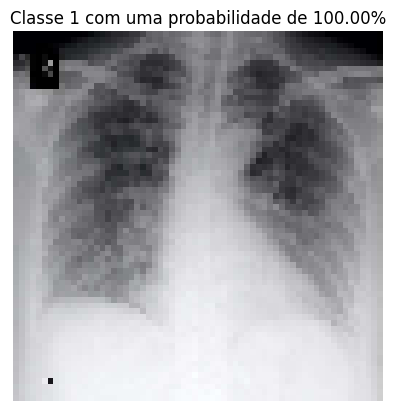

In [ ]:
# Interpretação dos resultados
if prediction[0] > 0.5:
    result = f"Classe 1 com uma probabilidade de {prediction[0][0]*100:.2f}%"
else:
    result = f"Classe 0 com uma probabilidade de {(1-prediction[0][0])*100:.2f}%"

# Exibir a imagem junto com o resultado
plt.imshow(image.array_to_img(img_array[0]))
plt.title(result)
plt.axis('off')  # Remove os eixos
plt.show()


from tensorflow.keras.preprocessing import image: Reimporta o módulo de pré-processamento de imagens.

import matplotlib.pyplot as plt: Importa o Matplotlib para exibição de gráficos e imagens.

image_path: Define o caminho para uma nova imagem a ser classificada.

img = image.load_img(image_path, target_size=(64, 64)): Carrega a imagem e a redimensiona para 64x64 pixels.

img_array = image.img_to_array(img): Converte a imagem em um array NumPy.

img_array = np.expand_dims(img_array, axis=0): Adiciona uma dimensão extra ao array para representar um lote com uma única imagem.

img_array /= 255.0: Normaliza a imagem, dividindo os valores dos pixels por 255